In [47]:
import pandas as pd
import torch.nn as nn
import torch
import numpy as np
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.autograd import Variable
import os
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('data.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data

,Date,Close,Open,High,Low,PE,Ratio
0,1960-01-04,59.910000,59.910000,59.910000,59.910000,18.34,17.12
1,1960-01-05,60.389999,60.389999,60.389999,60.389999,18.34,17.12
2,1960-01-06,60.130001,60.130001,60.130001,60.130001,18.34,17.12
3,1960-01-07,59.689999,59.689999,59.689999,59.689999,18.34,17.12
4,1960-01-08,59.500000,59.500000,59.500000,59.500000,18.34,17.12
...,...,...,...,...,...,...,...
15671,2022-02-11,4418.640000,4506.270000,4526.330000,4401.410000,37.56,25.93
15672,2022-02-14,4401.670000,4412.610000,4426.220000,4364.840000,37.56,25.93
15673,2022-02-15,4471.070000,4429.280000,4472.770000,4429.280000,37.56,25.93
15674,2022-02-16,4475.010000,4455.750000,4489.550000,4429.680000,37.56,25.93


In [30]:
rows = [x for x in data.index if data.loc[x]['Open'] == 0]
data = data.drop(rows, axis=0)
data

,Date,Close,Open,High,Low,PE,Ratio
0,1960-01-04,59.910000,59.910000,59.910000,59.910000,18.34,17.12
1,1960-01-05,60.389999,60.389999,60.389999,60.389999,18.34,17.12
2,1960-01-06,60.130001,60.130001,60.130001,60.130001,18.34,17.12
3,1960-01-07,59.689999,59.689999,59.689999,59.689999,18.34,17.12
4,1960-01-08,59.500000,59.500000,59.500000,59.500000,18.34,17.12
...,...,...,...,...,...,...,...
15671,2022-02-11,4418.640000,4506.270000,4526.330000,4401.410000,37.56,25.93
15672,2022-02-14,4401.670000,4412.610000,4426.220000,4364.840000,37.56,25.93
15673,2022-02-15,4471.070000,4429.280000,4472.770000,4429.280000,37.56,25.93
15674,2022-02-16,4475.010000,4455.750000,4489.550000,4429.680000,37.56,25.93


In [5]:
test_data = data.loc[ (data['Date']  >= '1980-01-01' )]
test_data

,Date,Close,Open,High,Low,PE,Ratio
5015,1980-01-02,105.760002,107.940002,108.430000,105.290001,8.85,7.39
5016,1980-01-03,105.220001,105.760002,106.080002,103.260002,8.85,7.39
5017,1980-01-04,106.519997,105.220001,107.080002,105.089996,8.85,7.39
5018,1980-01-07,106.809998,106.519997,107.800003,105.800003,8.85,7.39
5019,1980-01-08,108.949997,106.809998,109.290001,106.290001,8.85,7.39
...,...,...,...,...,...,...,...
15671,2022-02-11,4418.640000,4506.270000,4526.330000,4401.410000,37.56,25.93
15672,2022-02-14,4401.670000,4412.610000,4426.220000,4364.840000,37.56,25.93
15673,2022-02-15,4471.070000,4429.280000,4472.770000,4429.280000,37.56,25.93
15674,2022-02-16,4475.010000,4455.750000,4489.550000,4429.680000,37.56,25.93


<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

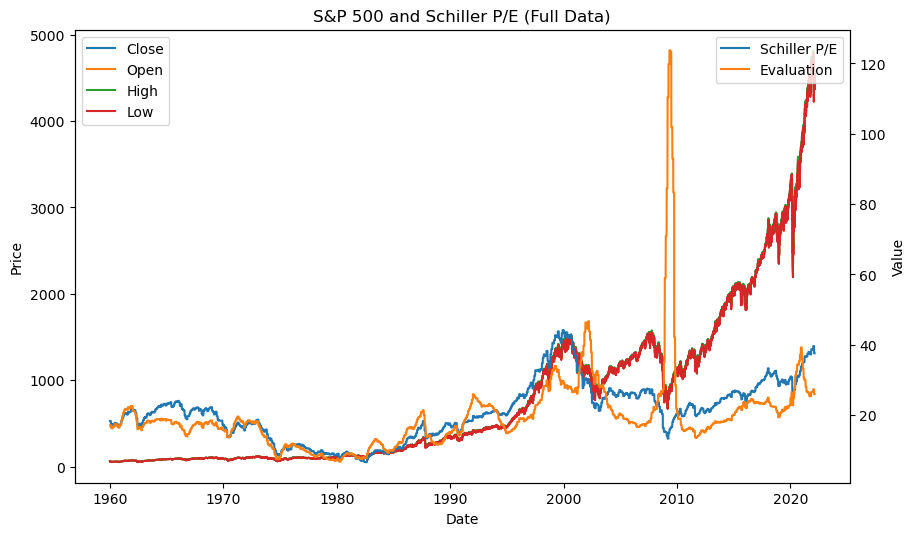

In [13]:
plt.figure(figsize=[10,6], dpi=100)
plt.plot(data.Date, data.Close.values, label = 'Close')
plt.plot(data.Date, data.Open.values, label = 'Open')
plt.plot(data.Date, data.High.values, label = 'High')
plt.plot(data.Date, data.Low.values, label = 'Low')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
ax2=plt.twinx()
ax2.plot(data.Date, data.PE.values, label = 'Schiller P/E')
ax2.plot(data.Date, data.Ratio.values, label = 'Evaluation')
ax2.set_ylabel("Value")
plt.legend()

plt.title("S&P 500 and Schiller P/E (Full Data)")
plt

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

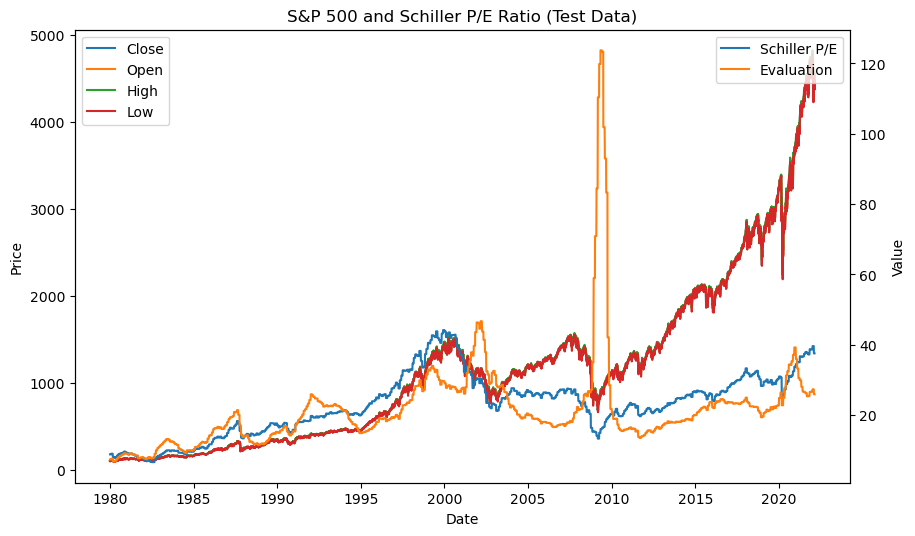

In [15]:
plt.figure(figsize=[10,6], dpi=100)
plt.plot(test_data.Date, test_data.Close.values, label = 'Close')
plt.plot(test_data.Date, test_data.Open.values, label = 'Open')
plt.plot(test_data.Date, test_data.High.values, label = 'High')
plt.plot(test_data.Date, test_data.Low.values, label = 'Low')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
ax2=plt.twinx()
ax2.plot(test_data.Date, test_data.PE.values, label = 'Schiller P/E')
ax2.plot(test_data.Date, test_data.Ratio.values, label = 'Evaluation')
ax2.set_ylabel("Value")
plt.legend()
plt.title("S&P 500 and Schiller P/E Ratio (Test Data)")
plt

In [31]:
dataset = data[['Close', 'Open', 'High', 'Low', 'PE', 'Ratio']].values
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(dataset)
dataset.shape

(15640, 6)

In [17]:
test_dataset = test_data[['Close', 'Open', 'High', 'Low', 'PE', 'Ratio']].values
test_dataset = scaler.fit_transform(test_dataset)
test_dataset

array([[0.00160482, 0.00206532, 0.00187538, 0.00236032, 0.05885486,
        0.00513084],
       [0.00148989, 0.00160211, 0.0013774 , 0.00192709, 0.05885486,
        0.00513084],
       [0.00176658, 0.00148737, 0.00158931, 0.00231763, 0.05885486,
        0.00513084],
       ...,
       [0.93072234, 0.92027053, 0.92671179, 0.92514421, 0.82343542,
        0.16367368],
       [0.93156093, 0.92589492, 0.9302676 , 0.92522958, 0.82343542,
        0.16367368],
       [0.91139424, 0.92596079, 0.92317081, 0.91330634, 0.82343542,
        0.16367368]])

In [18]:
date = data[['Date']].values
date.shape

(15640, 1)

In [19]:
test_date = test_data[['Date']].values
test_date.shape

(10625, 1)

In [21]:
# training:0: 0 -180：181 当你输入0-180 predict：181
# 1: 1 -181: 182    1-181， predict：182


# test:2. 200-380 predict：x
#         ｜x - actual｜ / actual 


seq_len = 180
input_size = 6
output_size = 4

real_list = []
label_list = []
date_list = []
for i in range(dataset.shape[0] - seq_len - output_size + 1):
    real_list.append(dataset[i: i + seq_len, ])
    label_list.append(dataset[i + seq_len: i + seq_len + output_size, 0])
    date_list.append(date[i + seq_len])
real_list = np.array(real_list)
label_list = np.array(label_list)
date_list = np.array(date_list)
label_list = np.reshape(label_list, (label_list.shape[0], 1, label_list.shape[1]))
print("real_list: " , real_list.shape)
print("label_list: " , label_list.shape)
print("date_list: " , date_list.shape)

real_list:  (15457, 180, 6)
label_list:  (15457, 1, 4)
date_list:  (15457, 1)


In [22]:
seq_len = 180
input_size = 6
output_size = 4

test_real = []
test_label = []
test_date_list = []
for i in range(test_dataset.shape[0] - seq_len - output_size + 1):
    test_real.append(test_dataset[i: i + seq_len, ])
    test_label.append(test_dataset[i + seq_len: i + seq_len + output_size, 0])
    test_date_list.append(test_date[i + seq_len])
test_real = np.array(test_real)
test_label = np.array(test_label)
test_date_list = np.array(test_date_list)
test_label = np.reshape(test_label, (test_label.shape[0], 1, test_label.shape[1]))
print("test_real_list: " , test_real.shape)
print("test_label_list: " , test_label.shape)
print("test_date_list: " , test_date_list.shape)

test_real_list:  (10442, 180, 6)
test_label_list:  (10442, 1, 4)
test_date_list:  (10442, 1)


In [23]:
real_train_list = []
label_train_list = []
real_test_list = []
label_test_list = []
date_train_list = []
date_test_list = []

"""
80% 用于训练
"""
for i in range(real_list.shape[0]):
    if i % real_list.shape[0] <= real_list.shape[0] * 0.8:
        real_train_list.append(real_list[i,])
        label_train_list.append(label_list[i,])
        date_train_list.append(date_list[i,])
    else:
        real_test_list.append(real_list[i,])
        label_test_list.append(label_list[i,])
        date_test_list.append(date_list[i,])
real_train_list = np.array(real_train_list)
label_train_list = np.array(label_train_list)
real_test_list = np.array(real_test_list)
label_test_list = np.array(label_test_list)
date_train_list = np.array(date_train_list)
date_test_list = np.array(date_test_list)
print("real_train_list: " , real_train_list.shape)
print("label_train_list: " , label_train_list.shape)
print("real_test_list: " , real_test_list.shape)
print("label_test_list: " , label_test_list.shape)
print("date_train_list: " , date_train_list.shape)
print("date_test_list: " , date_test_list.shape)

real_train_list:  (12366, 180, 6)
label_train_list:  (12366, 1, 4)
real_test_list:  (3091, 180, 6)
label_test_list:  (3091, 1, 4)
date_train_list:  (12366, 1)
date_test_list:  (3091, 1)


In [24]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_layers):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers        
        self.rnn = nn.RNN(input_size = input_size, hidden_size = hidden_size, num_layers = num_layers, batch_first = True)
        self.linear = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
#         print(x.shape)
        batch_size = x.size(0)
        hidden = self.init_hidden(batch_size)
        res, hidden = self.rnn(x, hidden)
        res = self.linear(res)
        return res[:, -1, :], hidden
        
    def init_hidden(self, batch_size):
        # This method generates the first hidden state of zeros which we'll use in the forward pass
        # We'll send the tensor holding the hidden state to the device we specified earlier as well
        hidden = torch.zeros(self.num_layers, batch_size, self.hidden_size)
        return hidden

In [25]:
hidden_size = 60
num_layers = 1
learning_rate = 0.001
num_epochs = 100

In [26]:
model = RNN(input_size, output_size, hidden_size, num_layers)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()
loss_arr = []

for epoch in range(num_epochs):
    # make training sets in torch
    inputs = Variable(torch.from_numpy(real_train_list).float())
    labels = Variable(torch.from_numpy(label_train_list).float())
    
    # zero the parameter (weight) gradients
    optimizer.zero_grad()

    # Perform forward pass
    output, hidden = model(inputs)   
    
    # Compute loss
    loss = criterion(output.reshape(-1), labels.view(-1))
    loss_arr.append(loss.item())
       
    # Backward pass
    loss.backward(retain_graph=True)
    
    if (epoch % 10 == 0 or epoch == num_epochs - 1):
        print("[%d/%d] Loss: %.4f" % (epoch, num_epochs, loss.item()))
    
    # Update parameters
    optimizer.step()                                

[0/100] Loss: 0.0431
[10/100] Loss: 0.0069
[20/100] Loss: 0.0031
[30/100] Loss: 0.0013
[40/100] Loss: 0.0007
[50/100] Loss: 0.0003
[60/100] Loss: 0.0001
[70/100] Loss: 0.0001
[80/100] Loss: 0.0000
[90/100] Loss: 0.0000
[99/100] Loss: 0.0000


<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

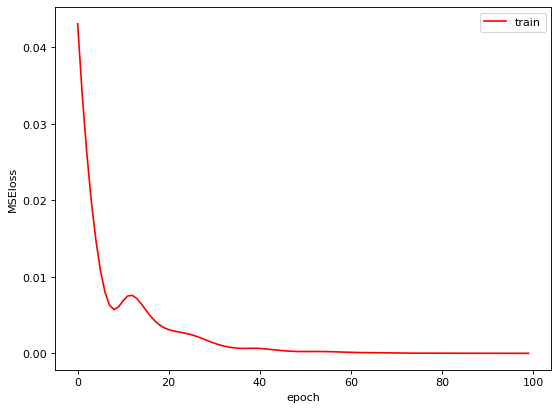

In [27]:
plt.figure(figsize=[8,6], dpi=80)
plt.plot(np.array(loss_arr), 'r', label = 'train')
plt.xlabel("epoch")
plt.ylabel("MSEloss")
plt.legend()
plt

In [40]:
output, hidden = model(Variable(torch.from_numpy(test_real).float()))
output

tensor([[0.0046, 0.0013, 0.0072, 0.0115],
        [0.0048, 0.0014, 0.0074, 0.0117],
        [0.0050, 0.0016, 0.0076, 0.0119],
        ...,
        [0.7884, 0.7606, 0.8139, 0.8223],
        [0.7886, 0.7613, 0.8141, 0.8219],
        [0.7846, 0.7579, 0.8096, 0.8180]], grad_fn=<SliceBackward0>)

In [61]:
prediction = output.detach().numpy()
temp = np.zeros((1, prediction.shape[0]))
prediction = np.c_[prediction, temp.T]
prediction = np.c_[prediction, temp.T]
prediction = scaler.inverse_transform(prediction)
prediction = np.delete(prediction, [4, 5], axis = 1)
prediction

array([[  74.10811338,   58.21194133,   86.37569016,  105.65268369],
       [  75.06612128,   59.05028396,   87.35532289,  106.616899  ],
       [  76.0359355 ,   59.9109333 ,   88.26204825,  107.50494384],
       ...,
       [3792.4452671 , 3666.65898597, 3931.71194063, 3939.79329869],
       [3793.55265665, 3670.1493126 , 3932.52532113, 3937.84344733],
       [3774.39108458, 3653.76528544, 3911.14219251, 3919.51771944]])

In [62]:
def calculate_prediction_error(predicted, actual):
    return abs(predicted - actual)/actual

In [64]:
actual = np.concatenate( (test_label[:, :, 0], test_label[:, :, 1], test_label[:, :, 2], test_label[:, :, 3]), axis = 1)
temp = np.zeros((1, actual.shape[0]))
actual = np.c_[actual, temp.T]
actual = np.c_[actual, temp.T]
actual = scaler.inverse_transform(actual)
actual = np.delete(actual, [4, 5], axis = 1)
actual

array([[  83.15021012,   82.72667266,   83.67963164,   83.73786503],
       [  82.67560549,   83.58644271,   84.84628931,   82.76159809],
       [  83.53393725,   84.74964673,   83.86223278,   83.70767225],
       ...,
       [4501.21517336, 4422.24881941, 4418.00795536, 4452.44742282],
       [4414.93829293, 4405.08388441, 4488.41357692, 4456.41287415],
       [4397.80207265, 4475.2810847 , 4492.41066841, 4361.05081483]])

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

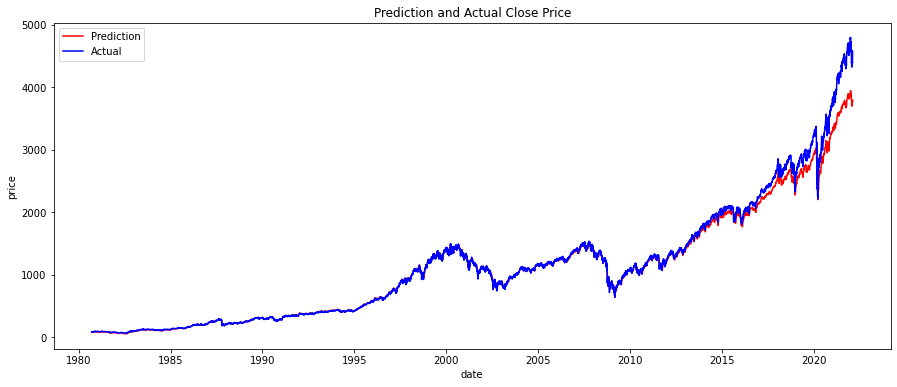

In [65]:
plt.figure(figsize=[15,6])
plt.plot(test_date_list[:, 0], prediction[:, 0], 'red', label = 'Prediction')
plt.plot(test_date_list[:, 0], actual[:, 0], 'blue', label = 'Actual')
plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("price")
plt.title("Prediction and Actual Close Price")
plt.legend()
plt

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

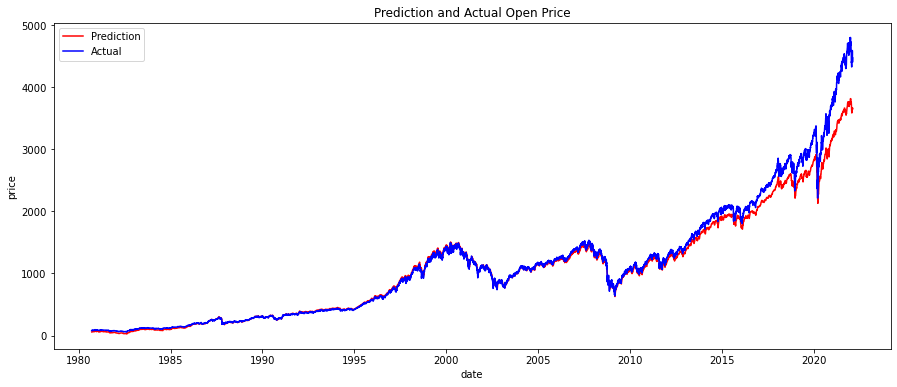

In [67]:
plt.figure(figsize=[15,6])
plt.plot(test_date_list[:, 0], prediction[:, 1], 'red', label = 'Prediction')
plt.plot(test_date_list[:, 0], actual[:, 1], 'blue', label = 'Actual')
plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("price")
plt.title("Prediction and Actual Open Price")
plt.legend()
plt

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

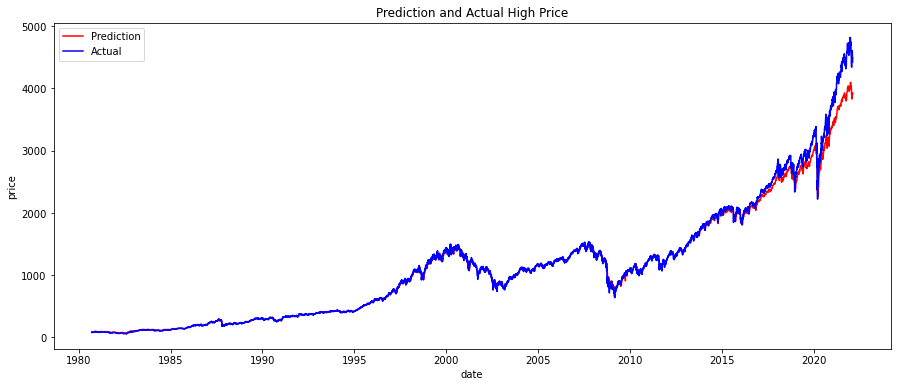

In [68]:
plt.figure(figsize=[15,6])
plt.plot(test_date_list[:, 0], prediction[:, 2], 'red', label = 'Prediction')
plt.plot(test_date_list[:, 0], actual[:, 2], 'blue', label = 'Actual')
plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("price")
plt.title("Prediction and Actual High Price")
plt.legend()
plt

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

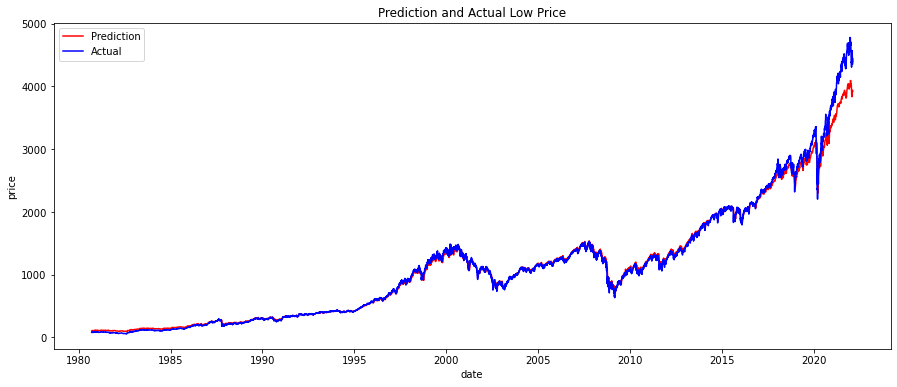

In [69]:
plt.figure(figsize=[15,6])
plt.plot(test_date_list[:, 0], prediction[:, 3], 'red', label = 'Prediction')
plt.plot(test_date_list[:, 0], actual[:, 3], 'blue', label = 'Actual')
plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("price")
plt.title("Prediction and Actual Low Price")
plt.legend()
plt

In [70]:
error = calculate_prediction_error(prediction, actual)
error.shape

(10442, 4)

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

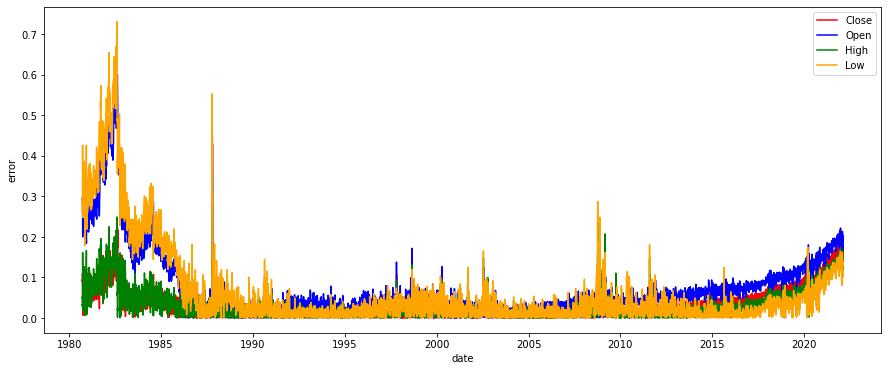

In [71]:
plt.figure(figsize=[15,6])
plt.plot(test_date_list[:, 0], error[:, 0], 'red', label = 'Close')
plt.plot(test_date_list[:, 0], error[:, 1], 'blue', label = 'Open')
plt.plot(test_date_list[:, 0], error[:, 2], 'green', label = 'High')
plt.plot(test_date_list[:, 0], error[:, 3], 'orange', label = 'Low')

plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("error")
plt.legend()
plt

In [72]:
# """

# validation ｜ 把training dataset 分成 80% 20%，其中20%用来做validation dataset

# """


real_val_list = []
label_val_list = []
real_train_list_new = []
label_train_list_new = []
date_train_list_new = []
date_val_list = []



for i in range(real_train_list.shape[0]):
    if i % real_train_list.shape[0] <= real_train_list.shape[0] * 0.8:
        real_train_list_new.append(real_train_list[i,])
        label_train_list_new.append(label_train_list[i,])
        date_train_list_new.append(date_train_list[i,])
    else:
        real_val_list.append(real_train_list[i,])
        label_val_list.append(label_train_list[i,])
        date_val_list.append(date_train_list[i,])
real_train_list_new = np.array(real_train_list_new)
label_train_list_new = np.array(label_train_list_new)
real_val_list = np.array(real_val_list)
label_val_list = np.array(label_val_list)
date_train_list_new = np.array(date_train_list_new)
date_val_list = np.array(date_val_list)
print("real_train_list_new: " , real_train_list_new.shape)
print("label_train_list_new: " , label_train_list_new.shape)
print("real_val_list: " , real_val_list.shape)
print("label_val_list: " , label_val_list.shape)
print("date_train_list_new: " , date_train_list_new.shape)
print("date_val_list: " , date_val_list.shape)

# """
# real_train_list_new:  (9893, 180, 4)
# 9893:batch size
# 180: seq length
# 4: feature
# """

real_train_list_new:  (9893, 180, 6)
label_train_list_new:  (9893, 1, 4)
real_val_list:  (2473, 180, 6)
label_val_list:  (2473, 1, 4)
date_train_list_new:  (9893, 1)
date_val_list:  (2473, 1)


In [73]:
model_val = RNN(input_size, output_size, hidden_size, num_layers)
optimizer = torch.optim.Adam(model_val.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

loss_arr = []
loss_val_arr = []

for epoch in range(num_epochs):
    # make training sets in torch
    inputs = Variable(torch.from_numpy(real_train_list_new).float())
    labels = Variable(torch.from_numpy(label_train_list_new).float())
    
    # zero the parameter (weight) gradients
    optimizer.zero_grad()

    # Perform forward pass
    output, hidden = model_val(inputs)   
    
    # Compute loss
    loss = criterion(output.reshape(-1), labels.view(-1))
    loss_arr.append(loss.item())
       
    # Backward pass
    loss.backward(retain_graph=True)
       
    #loss for validation
    inputs_val = torch.from_numpy(real_val_list).float()
    labels_val = torch.from_numpy(label_val_list).float()
    output_val, hidden_val = model_val(inputs_val)
    loss_val = criterion(output_val.reshape(-1), labels_val.view(-1))
    loss_val_arr.append(loss_val.item())
    
    if (epoch % 10 == 0 or epoch == num_epochs - 1):
        print("[%d/%d] Loss: %.4f" % (epoch, num_epochs, loss.item()))
        print("[%d/%d] Loss_Val: %.4f" % (epoch, num_epochs, loss_val.item()))
    
    # Update parameters
    optimizer.step()                                

[0/100] Loss: 0.0305
[0/100] Loss_Val: 0.1204
[10/100] Loss: 0.0039
[10/100] Loss_Val: 0.0187
[20/100] Loss: 0.0017
[20/100] Loss_Val: 0.0183
[30/100] Loss: 0.0014
[30/100] Loss_Val: 0.0181
[40/100] Loss: 0.0008
[40/100] Loss_Val: 0.0074
[50/100] Loss: 0.0004
[50/100] Loss_Val: 0.0043
[60/100] Loss: 0.0003
[60/100] Loss_Val: 0.0024
[70/100] Loss: 0.0002
[70/100] Loss_Val: 0.0010
[80/100] Loss: 0.0001
[80/100] Loss_Val: 0.0006
[90/100] Loss: 0.0001
[90/100] Loss_Val: 0.0005
[99/100] Loss: 0.0000
[99/100] Loss_Val: 0.0004


<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

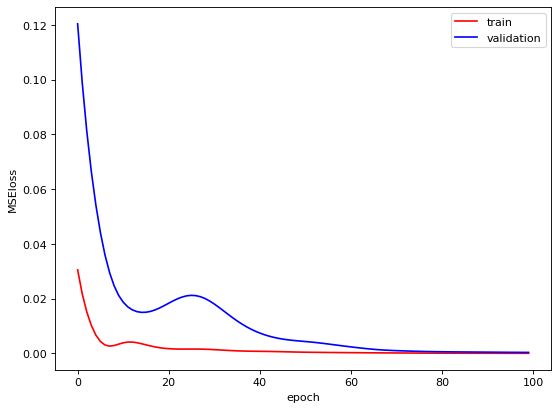

In [74]:
plt.figure(figsize=[8,6], dpi=80)
plt.plot(np.array(loss_arr), 'r', label = 'train')
plt.plot(np.array(loss_val_arr), 'b', label = 'validation')
plt.xlabel("epoch")
plt.ylabel("MSEloss")
plt.legend()
plt

In [79]:
output_val, hidden = model_val(Variable(torch.from_numpy(test_real).float()))
output_val.shape

torch.Size([10442, 4])

In [80]:
prediction_val = output_val.detach().numpy()
temp = np.zeros((1, prediction_val.shape[0]))
prediction_val = np.c_[prediction_val, temp.T]
prediction_val = np.c_[prediction_val, temp.T]
prediction_val = scaler.inverse_transform(prediction_val)
prediction_val = np.delete(prediction_val, [4, 5], axis = 1)
prediction_val.shape

(10442, 4)

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

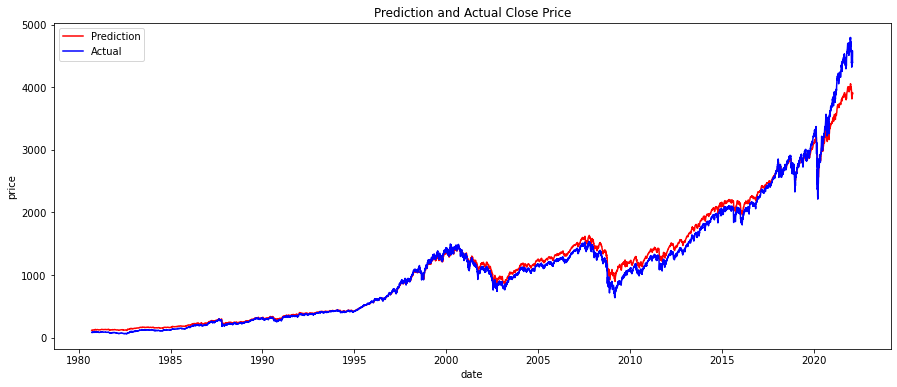

In [81]:
plt.figure(figsize=[15,6])
plt.plot(test_date_list[:, 0], prediction_val[:, 0], 'red', label = 'Prediction')
plt.plot(test_date_list[:, 0], actual[:, 0], 'blue', label = 'Actual')
plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("price")
plt.title("Prediction and Actual Close Price")
plt.legend()
plt

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

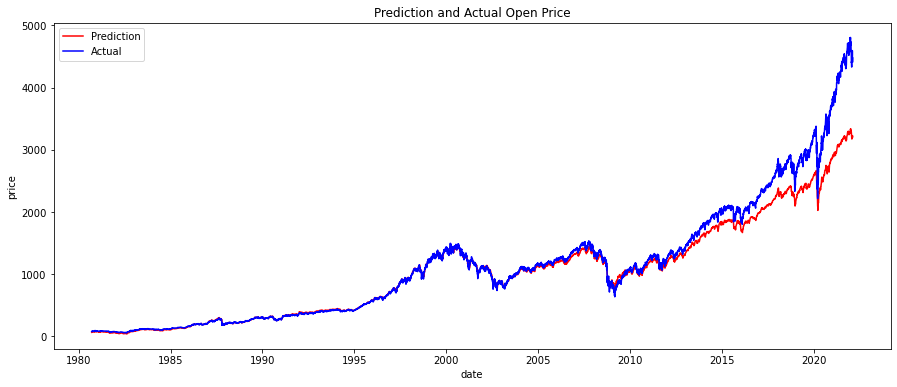

In [82]:
plt.figure(figsize=[15,6])
plt.plot(test_date_list[:, 0], prediction_val[:, 1], 'red', label = 'Prediction')
plt.plot(test_date_list[:, 0], actual[:, 1], 'blue', label = 'Actual')
plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("price")
plt.title("Prediction and Actual Open Price")
plt.legend()
plt

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

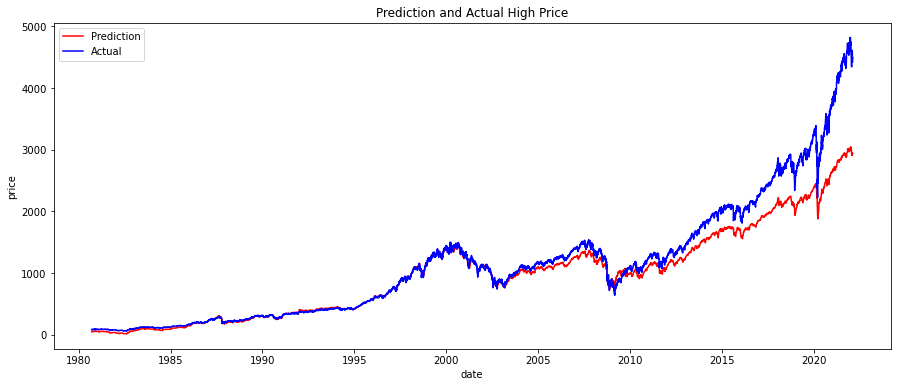

In [83]:
plt.figure(figsize=[15,6])
plt.plot(test_date_list[:, 0], prediction_val[:, 2], 'red', label = 'Prediction')
plt.plot(test_date_list[:, 0], actual[:, 2], 'blue', label = 'Actual')
plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("price")
plt.title("Prediction and Actual High Price")
plt.legend()
plt

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

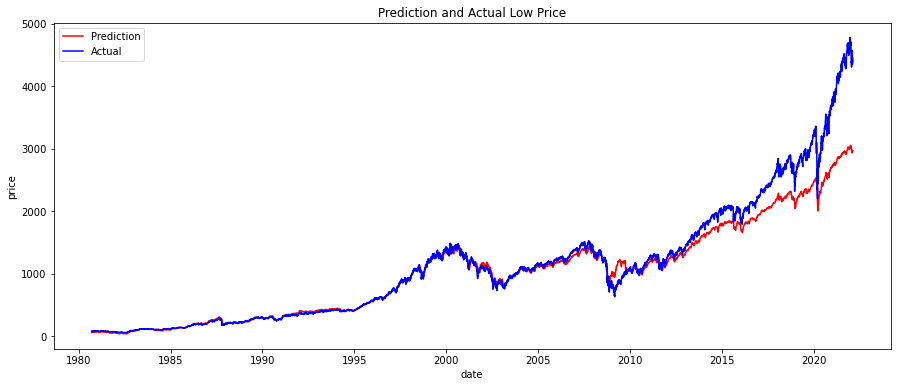

In [84]:
plt.figure(figsize=[15,6])
plt.plot(test_date_list[:, 0], prediction_val[:, 3], 'red', label = 'Prediction')
plt.plot(test_date_list[:, 0], actual[:, 3], 'blue', label = 'Actual')
plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("price")
plt.title("Prediction and Actual Low Price")
plt.legend()
plt

In [85]:
error_val = calculate_prediction_error(prediction_val, actual)
error_val

array([[0.38969759, 0.18913228, 0.45748329, 0.24988395],
       [0.40765535, 0.18889883, 0.45893053, 0.23431551],
       [0.40688518, 0.19034605, 0.44180817, 0.23426626],
       ...,
       [0.13001143, 0.27015576, 0.33318424, 0.33322805],
       [0.1130268 , 0.26831637, 0.34354801, 0.3322712 ],
       [0.11381233, 0.28360658, 0.34601386, 0.31883262]])

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

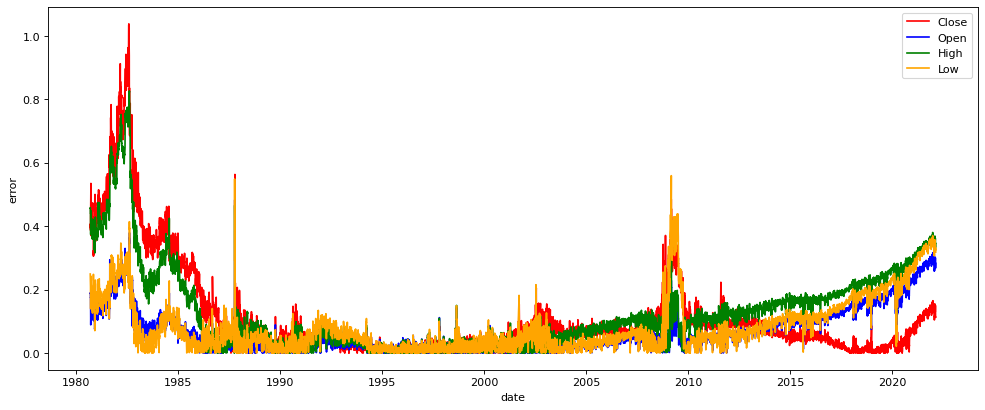

In [86]:
plt.figure(figsize=[15,6], dpi=80)
plt.plot(test_date_list[:, 0], error_val[:, 0], 'red', label = 'Close')
plt.plot(test_date_list[:, 0],error_val[:, 1], 'blue', label = 'Open')
plt.plot(test_date_list[:, 0],error_val[:, 2], 'green', label = 'High')
plt.plot(test_date_list[:, 0],error_val[:, 3], 'orange', label = 'Low')
plt.xlabel("date")
plt.ylabel("error")
plt.legend()
plt

In [87]:
def add_gaussian_noise(dataset, std_dev):
    dataset_reshape = dataset.reshape(dataset.shape[0] * dataset.shape[1] * dataset.shape[2], 1)
    noise = np.random.normal(0, std_dev, int(len(dataset_reshape) * 0.2))
    # Add the noise to image
    gp = np.random.uniform(0, dataset.shape[0] * dataset.shape[1] * dataset.shape[2], int(len(dataset_reshape) * 0.2))
    for i in range(int(len(dataset_reshape) * 0.2)):
        if dataset_reshape[int(gp[i])]==1:
            dataset_reshape[int(gp[i])]-=abs(noise[i])
        else:
            dataset_reshape[int(gp[i])]+=abs(noise[i])
    #gaussian_out = img + noise
    # Make the value between 0 and 1
    dataset_reshape = dataset_reshape.reshape(dataset.shape[0], dataset.shape[1], dataset.shape[2])
    gaussian_out = np.clip(dataset_reshape, 0.00000001, 1)
    return gaussian_out

In [89]:
std_dev = [0.001, 0.002, 0.003, 0.005, 0.01, 0.02, 0.03, 0.05, 0.1]
gaussian_error_array = np.zeros([len(std_dev), test_label.shape[0], test_label.shape[2]])
for i in range(len(std_dev)):
    gaussian_real_test = add_gaussian_noise(test_real, std_dev[i])
    gaussian_label_test = add_gaussian_noise(test_label, std_dev[i])
#     gaussian_output = model(gaussian_real_test)
    gaussian_output, hidden = model_val(Variable(torch.from_numpy(gaussian_real_test).float()))
    
    gaussian_prediction = gaussian_output.detach().numpy()
    temp = np.zeros((1, gaussian_prediction.shape[0]))
    gaussian_prediction = np.c_[gaussian_prediction, temp.T]
    gaussian_prediction = np.c_[gaussian_prediction, temp.T]
    gaussian_prediction = scaler.inverse_transform(gaussian_prediction)
    gaussian_prediction = np.delete(gaussian_prediction, [4, 5], axis = 1)
    
    gaussian_actual = np.concatenate( (test_label[:, :, 0], test_label[:, :, 1], test_label[:, :, 2], test_label[:, :, 3]), axis = 1)
    temp = np.zeros((1, gaussian_actual.shape[0]))
    gaussian_actual = np.c_[gaussian_actual, temp.T]
    gaussian_actual = np.c_[gaussian_actual, temp.T]
    gaussian_actual = scaler.inverse_transform(gaussian_actual)
    gaussian_actual = np.delete(gaussian_actual, [4, 5], axis = 1)
    
    gaussian_error = calculate_prediction_error(gaussian_prediction, gaussian_actual)
    gaussian_error_array[i] = gaussian_error
gaussian_error_array

array([[[0.41753516, 0.16583787, 0.44053028, 0.22984763],
        [0.41551747, 0.18009879, 0.45121577, 0.24081668],
        [0.36236547, 0.18823767, 0.43642256, 0.22885123],
        ...,
        [0.12999849, 0.27006672, 0.33310592, 0.33316196],
        [0.11463303, 0.26823775, 0.34342325, 0.33215552],
        [0.11342942, 0.28343012, 0.34575559, 0.31879326]],

       [[0.40382777, 0.16273633, 0.43166567, 0.22083306],
        [0.43040948, 0.16605921, 0.4427447 , 0.22865461],
        [0.38792254, 0.15849695, 0.40279363, 0.19367895],
        ...,
        [0.13542208, 0.27005942, 0.3331128 , 0.3331481 ],
        [0.1144975 , 0.27027242, 0.34504392, 0.33209778],
        [0.11323761, 0.28326435, 0.34565358, 0.31860519]],

       [[0.48463144, 0.09574224, 0.38575712, 0.14758129],
        [0.47447848, 0.15191214, 0.41525252, 0.17486572],
        [0.29652212, 0.43486461, 0.47308338, 0.18203624],
        ...,
        [0.13511361, 0.26987937, 0.33277185, 0.3330822 ],
        [0.11384313, 0.271730

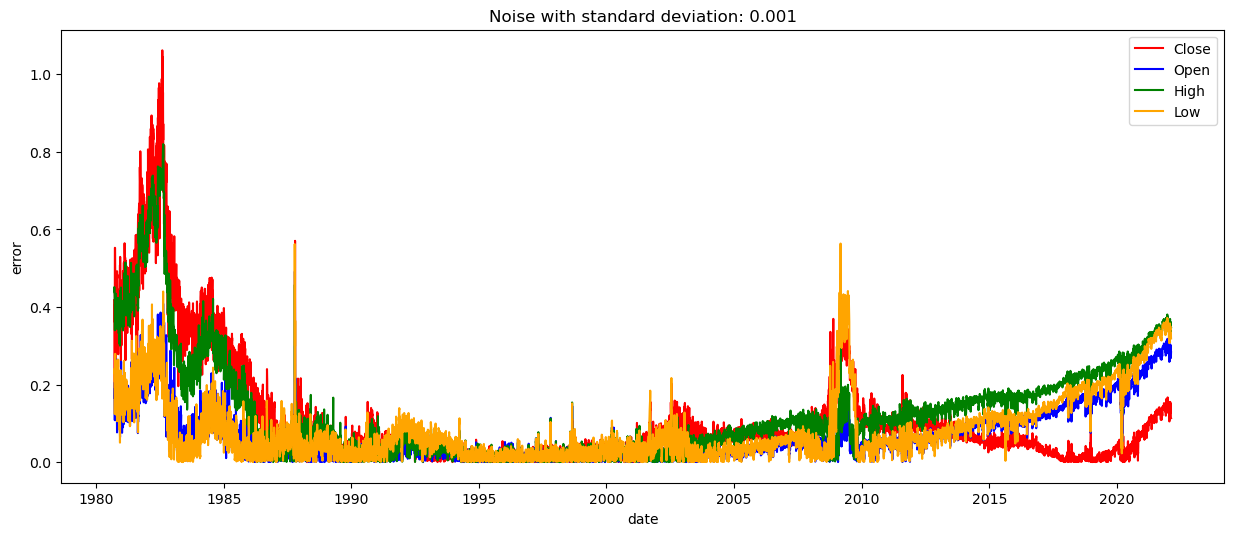

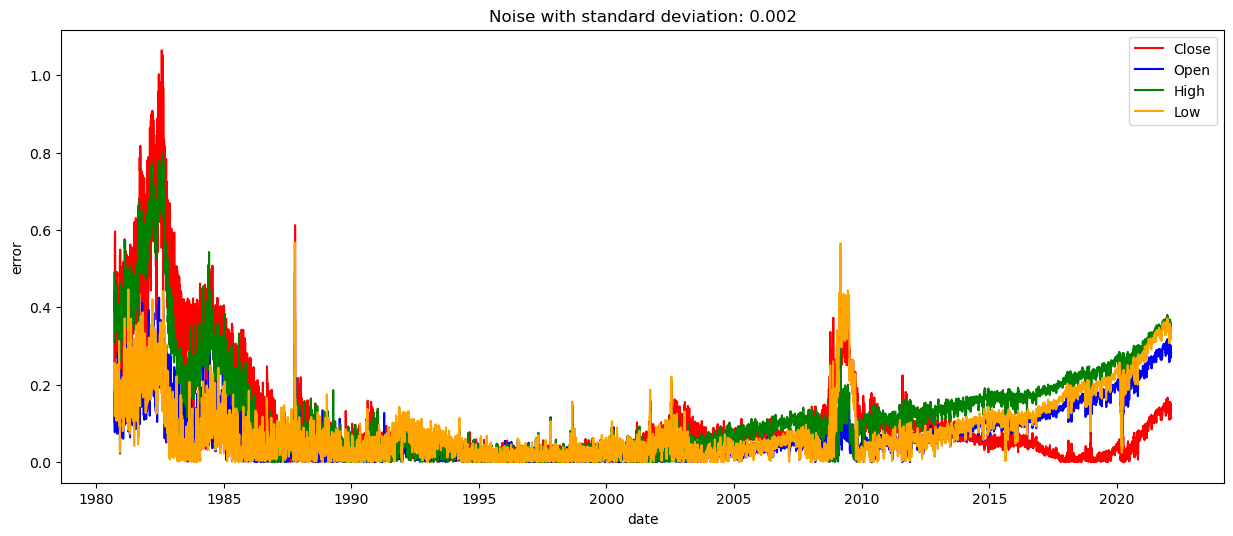

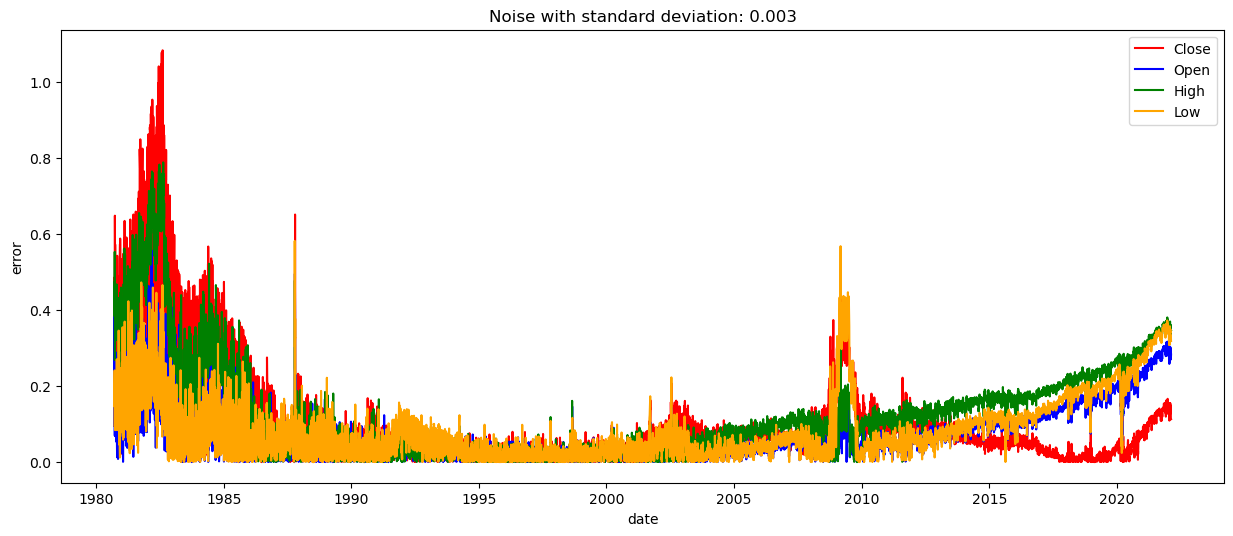

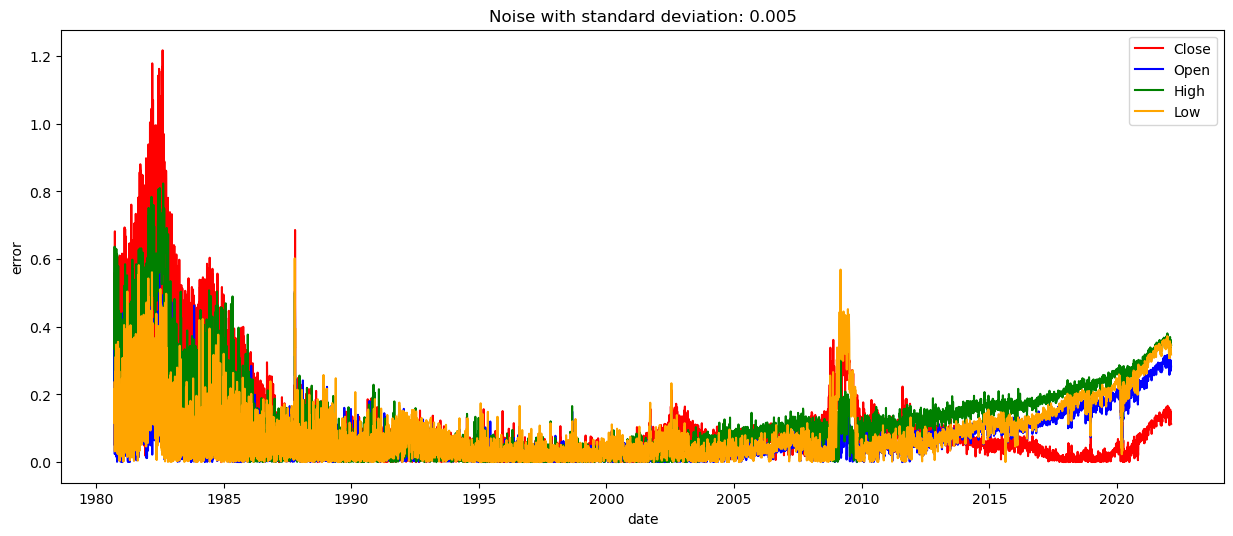

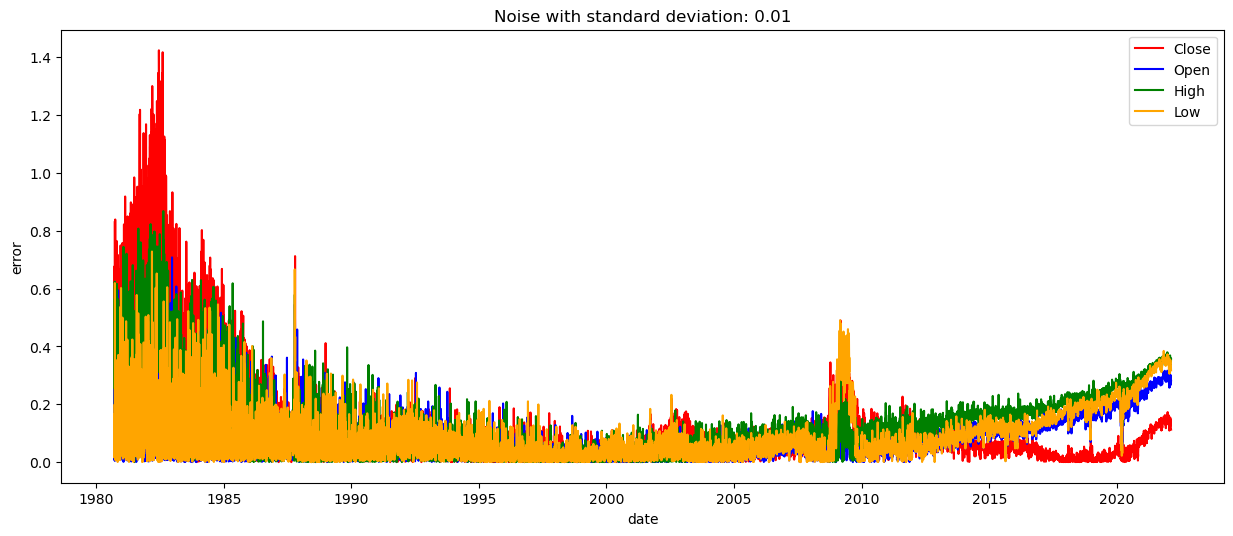

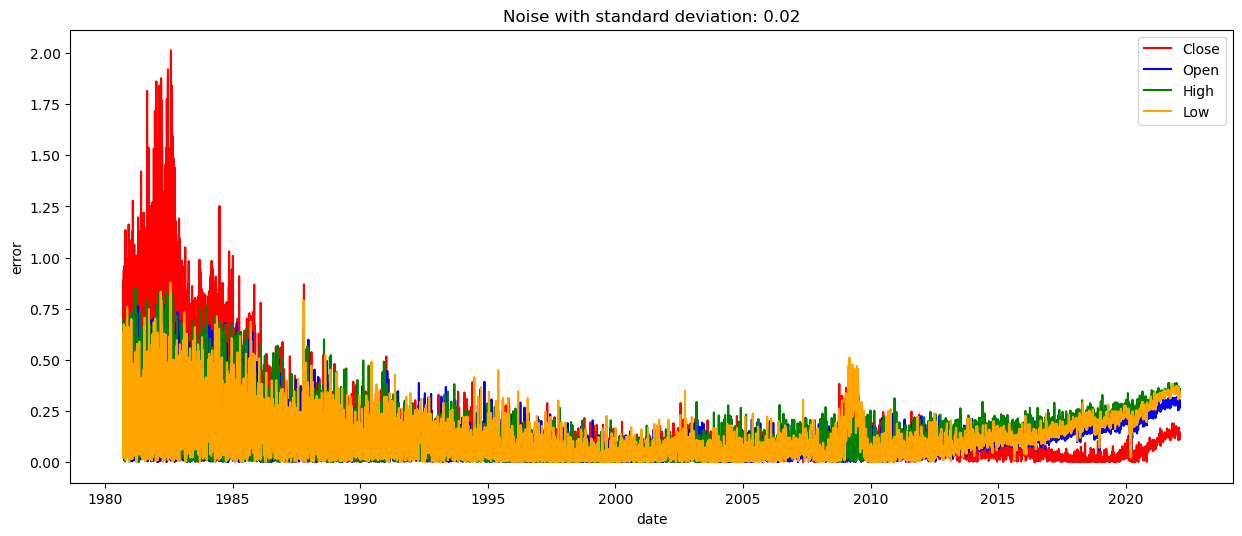

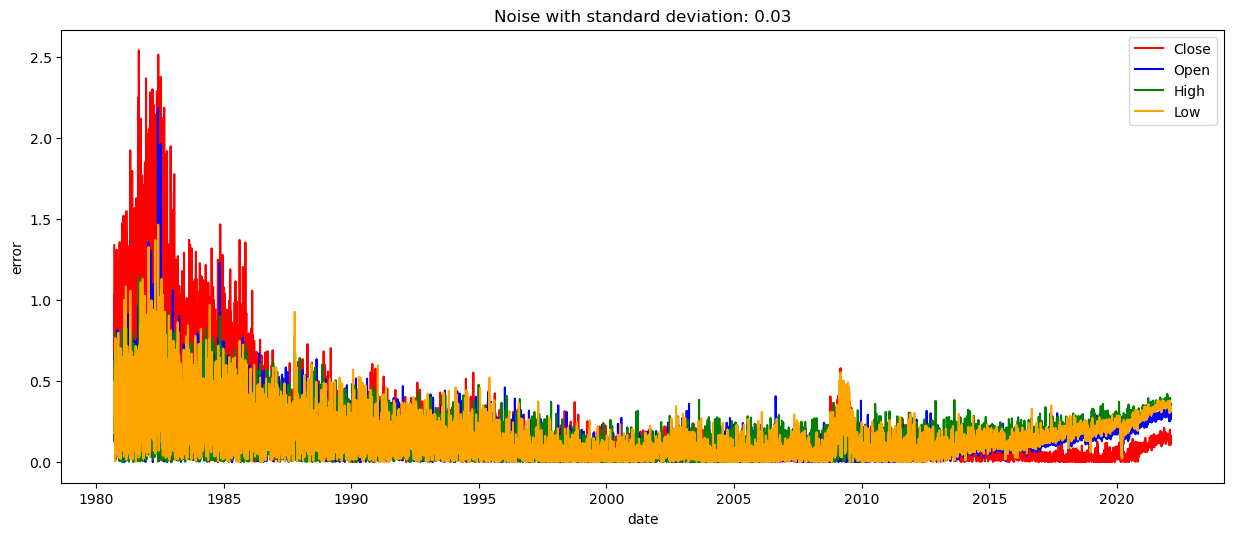

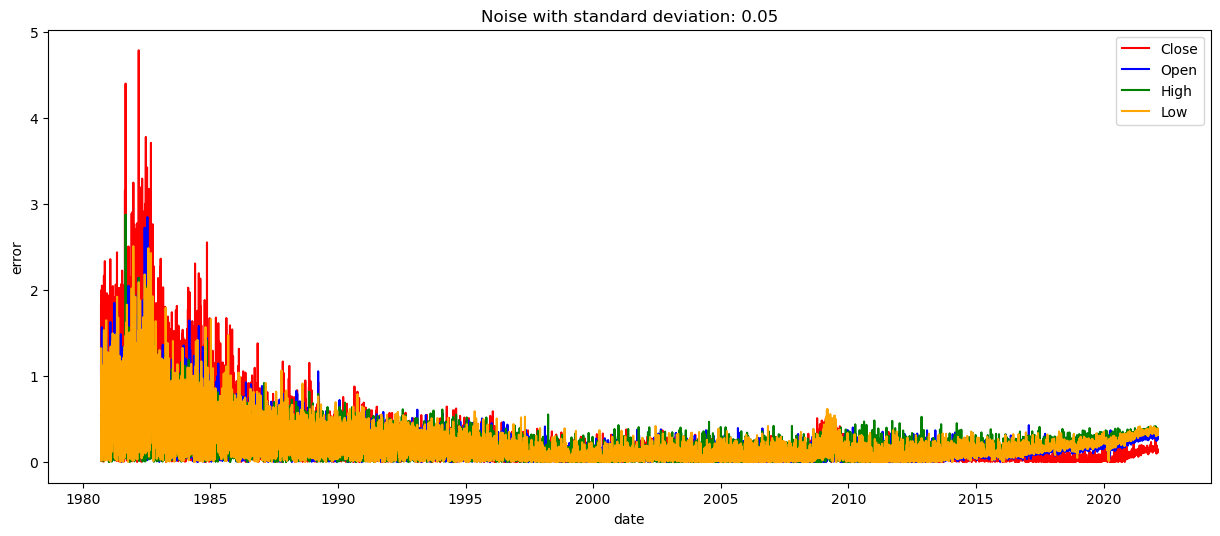

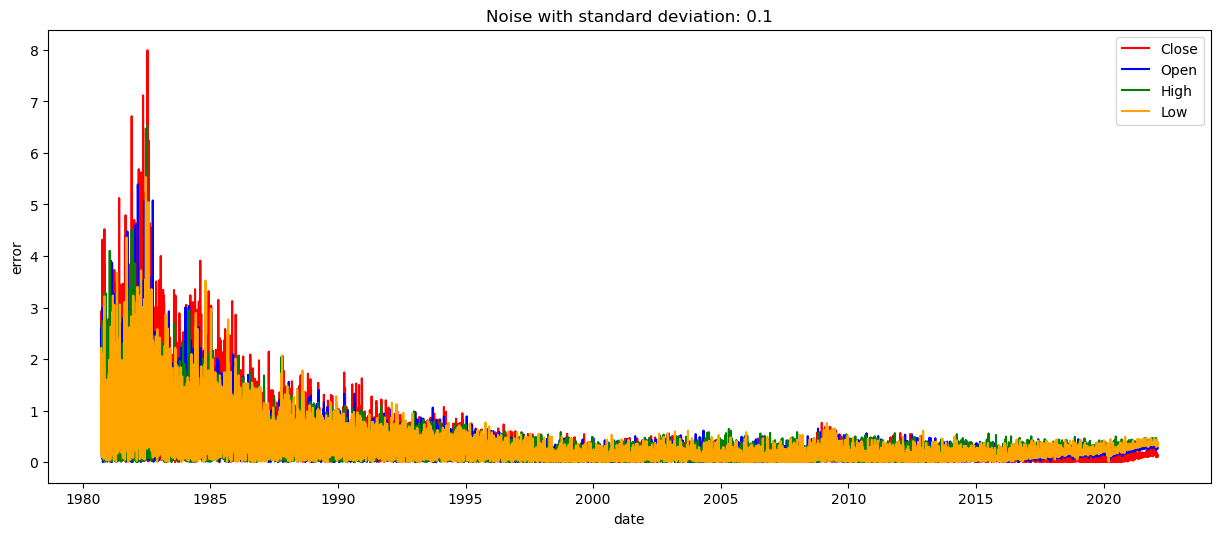

In [90]:
for i in range(len(std_dev)):
    plt.figure(figsize=[15,6], dpi=100)
    plt.plot(test_date_list[:, 0], gaussian_error_array[i, :, 0], 'red', label = 'Close')
    plt.plot(test_date_list[:, 0], gaussian_error_array[i, :, 1], 'blue', label = 'Open')
    plt.plot(test_date_list[:, 0], gaussian_error_array[i, :, 2], 'green', label = 'High')
    plt.plot(test_date_list[:, 0], gaussian_error_array[i, :, 3], 'orange', label = 'Low')
    plt.xlabel("date")
    plt.ylabel("error")
    plt.legend()
    plt.title("Noise with standard deviation: " + str(std_dev[i]))
    plt.show()